# Implementacion numerica de la ecuacion de calor con diferencias finitas progresivas en tiempo y centradas en espacio FTCS

La ecuacion de calor es:


\begin{eqnarray}
\begin{cases}
u_t - \alpha u_{xx} = 0  \\
u(x,0) = f(x) \quad, \quad \text{condicion initial} \\
u(0,t)=0 \quad \quad u(L,t)= 0  \quad , \quad \text{condiciones de borde} \\
f(x) = 6 \sin \left (  \frac{\pi x}{L}  \right )
\end{cases}
\end{eqnarray}



La solucion analitica (encontrada por el metodo de **separacion de variables**) es

$$u(x,t) = 6 \sin \left ( \frac{\pi x}{L} \right ) \mathrm{e}^{-\frac{1}{\alpha} \frac{\pi}{L}^2 t} $$

Vamos a asumir una barra entre $0$, $L$, $\alpha=1$,

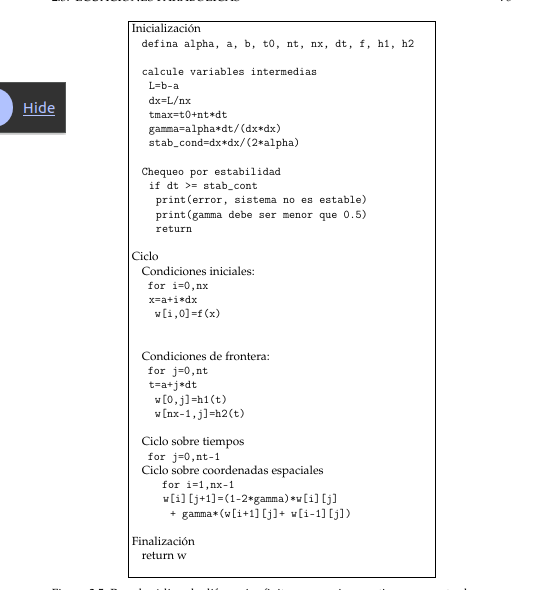

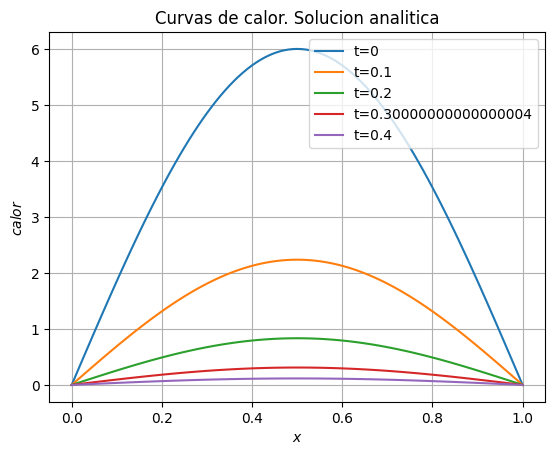

In [1]:
# inicialmente encontramos la solucion analitica
import numpy as np
import matplotlib.pyplot as plt

alpha=1
a=0
b=1
nx=101
X = np.linspace(a,b,nx)
L=b-a
def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp(-(1/alpha)*(np.pi/L)**2*t)

t0=0
dt=0.1
t=t0

params={'legend.fontsize':5, 'legend.handlength':1}

plt.xlabel(r"$x$")
plt.ylabel(r"$calor$")
plt.title("Curvas de calor. Solucion analitica")

nplots=5
for i in range(nplots):
    plt.plot(X, u(X,t), label="t="+str(t))
    plt.legend(labelspacing=1, title="tiempo")
    t+=dt
plt.legend()
plt.grid(True)
plt.show()

## Solucion numerica

In [2]:
def solu_eq_calor(alpha, a,b,t0,nt,nx,dt,f):
    '''
     alpha: constante de propagacion
     a: bordo izquierdo
     b: bordo derecho
     t0  : Tiempo inicial
     nt  : numero de muestras en tiempo
     nx  : numero de muestras espaciales
     dt  : muestreo en tiempo (sampling)
     f   : funcion inicial
    '''
    L = b - a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)
    stab_cond = dx**2/(2*alpha)

    # verificar estabilidad
    if dt >= stab_cond:
        print("error: la condicion de estabilidad fue violada")
        print(f"  dt={dt}")
        print(f"  debe ser menor que dx**2/(2 *alpha)={stab_cond}")
        print(f"  gamma debe ser menor que 1/2 y es {gamma}")
        return

    # inicializamos en ceros la solucion w
    w = np.zeros((nx,nt))
    tmax = nt*dt
    t = np.arange(t0,tmax,dt)
    X = np.linspace(a,b,w.shape[0])


    # condicion inicial
    for i in range(nx):
        w[i,0] = f(X[i])

    # condiciones de frontera
    for j in range(nt):
        w[0,j] = 0
        w[nx-1,j] = 0 # w[j, nx-1]

    # calculamos el campo propagado
    # ciclo sobre tiempos
    for j in range(nt-1):
        # ciclo sobre espacio
        for i in range(1,nx-1):
            w[i,j+1] = (1 - 2*gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j])

    return w



    return t, X, w



*** Prueba***

In [3]:
alpha=1
a=0
b=1
t0=0
nt=2
dt=0.1
nx=101
L=b-a

# definicion de la condicion inicial
def f(x):
    return 6*np.sin(np.pi*x/L)


w = solu_eq_calor(alpha, a,b,t0,nt,nx,dt,f)

error: la condicion de estabilidad fue violada
  dt=0.1
  debe ser menor que dx**2/(2 *alpha)=5e-05
  gamma debe ser menor que 1/2 y es 1000.0


In [4]:
# recalculemos
dt=0.00001
nt=40001
w = solu_eq_calor(alpha, a,b,t0,nt,nx,dt,f)

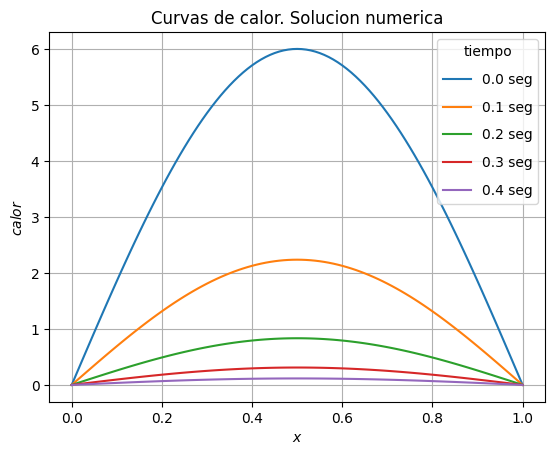

In [5]:
# graficamos
params={'legend.fontsize':5, 'legend.handlength':1}

plt.xlabel(r"$x$")
plt.ylabel(r"$calor$")
plt.title("Curvas de calor. Solucion numerica")

X = np.linspace(a,b,w.shape[0])
nsam=10000
for j in range(0,nt,nsam):
    t=j*dt
    plt.plot(X, w[:,j], label=str(round(t,1))+' seg')
    plt.legend(labelspacing=1, title="tiempo")

plt.grid(True)
plt.show()

### Grafico del error

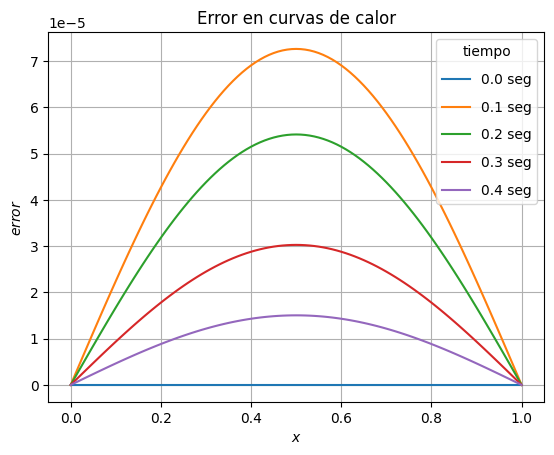

In [12]:
nt=40001
# dt=0.0001
dt=0.00001
dec=10000
Nt=int(nt/dec)+1
dx=(b-a)/(nx-1)
error = np.zeros((nx,Nt))

k=0
for j in range(0, nt, dec ):
    t=j*dt
    for i in range(nx):
        x=i*dx
        error[i,k] = w[i,j]-u(x,t)
    k+=1

# figura
params={'legend.fontsize':5, 'legend.handlength':1}
plt.xlabel(r"$x$")
plt.ylabel(r"$error$")
plt.title(r"Error en curvas de calor")

X =np.linspace(0,L,w.shape[0])
Dt=0.1
for j in range(Nt):
    t=j*Dt
    plt.plot(X, error[:,j], label=str(round(t,1))+' seg')
    plt.legend(labelspacing=1, title="tiempo")

plt.grid(True)
plt.show()


### Que pasa cuando se viola la estabilidad.



In [13]:
def solu_eq_calor(alpha, a,b,t0,nt,nx,dt,f):
    '''
     alpha: constante de propagacion
     a: bordo izquierdo
     b: bordo derecho
     t0  : Tiempo inicial
     nt  : numero de muestras en tiempo
     nx  : numero de muestras espaciales
     dt  : muestreo en tiempo (sampling)
     f   : funcion inicial
    '''
    L = b - a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)
    stab_cond = dx**2/(2*alpha)

    # verificar estabilidad
    if dt >= stab_cond:
        print("error: la condicion de estabilidad fue violada")
        print(f"  dt={dt}")
        print(f"  debe ser menor que dx**2/(2 *alpha)={stab_cond}")
        print(f"  gamma debe ser menor que 1/2 y es {gamma}")
    #    return

    # inicializamos en ceros la solucion w
    w = np.zeros((nx,nt))
    tmax = nt*dt
    t = np.arange(t0,tmax,dt)
    X = np.linspace(a,b,w.shape[0])


    # condicion inicial
    for i in range(nx):
        w[i,0] = f(X[i])

    # condiciones de frontera
    for j in range(nt):
        w[0,j] = 0
        w[nx-1,j] = 0 # w[j, nx-1]

    # calculamos el campo propagado
    # ciclo sobre tiempos
    for j in range(nt-1):
        # ciclo sobre espacio
        for i in range(1,nx-1):
            w[i,j+1] = (1 - 2*gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j])

    return w

In [14]:
# Prueba para gamma=0.2,0.5,1.5,15, t=0.1 seg
def getdt(gamma, dx, alpha):
    return gamma*dx**2/alpha

def ploterror(gammaarray, alpha, L, nx):
    params={'legend.fontsize':5, 'legend.handlength':1}
    plt.xlabel(r"$x$")
    plt.ylabel(r"$error$")
    plt.title(r"Error en curvas de calor")
    dx = L/(nx-1)
    tmax=0.1

    for i in range( len(gammaarray)):
        gamma=gammaarray[i]
        dt=getdt(gamma, dx, alpha)
        nt=int(tmax/dt) + 1
        w = solu_eq_calor(alpha, a,b,t0,nt,nx,dt,f)
        X = np.linspace(a,b,w.shape[0])
        plt.plot(X, w[:,nt-1], label=str(gammaarray[i]))
        plt.legend(labelspacing=1, title="$\gamma$")

        # limpliamos w
        w=np.zeros((nx,nt))
    plt.grid(True)


    plt.show()
    return




error: la condicion de estabilidad fue violada
  dt=5e-05
  debe ser menor que dx**2/(2 *alpha)=5e-05
  gamma debe ser menor que 1/2 y es 0.5
error: la condicion de estabilidad fue violada
  dt=0.00015000000000000001
  debe ser menor que dx**2/(2 *alpha)=5e-05
  gamma debe ser menor que 1/2 y es 1.5
error: la condicion de estabilidad fue violada
  dt=0.0015
  debe ser menor que dx**2/(2 *alpha)=5e-05
  gamma debe ser menor que 1/2 y es 15.0


<ipython-input-13-9616d07c3718>:46: RuntimeWarning: overflow encountered in scalar add
  w[i,j+1] = (1 - 2*gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j])
<ipython-input-13-9616d07c3718>:46: RuntimeWarning: overflow encountered in scalar multiply
  w[i,j+1] = (1 - 2*gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j])
<ipython-input-13-9616d07c3718>:46: RuntimeWarning: invalid value encountered in scalar add
  w[i,j+1] = (1 - 2*gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j])


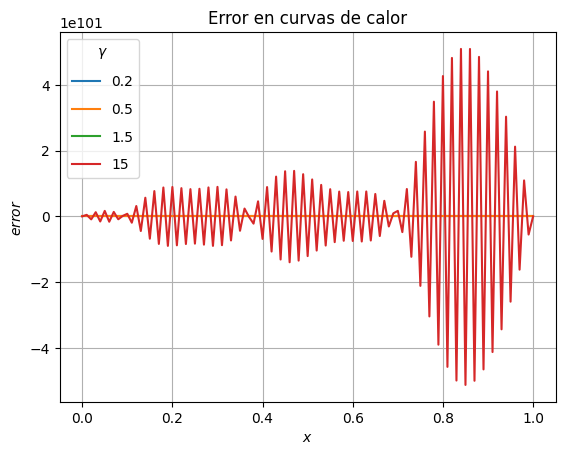

In [16]:
# prueba
alpha=1
a=0
b=1
t0=0
nx=101
L=b-a
gammaarray=[0.2,0.5,1.5,15]
ploterror(gammaarray, alpha, L, nx)


## Condiciones de frontera de Neumann
Las condiciones de frontera de Neumann son de las derivadas en la frontera, a diferencia de las de Dirichlet
que son los valores en la frontera. Ojo: Este Neumann es Carl Neumann (este es Aleman, el otro
[John Von Neumann](https://en.wikipedia.org/wiki/John_von_Neumann) es de las condiciones de estabilidad.

En numeros (cuantitativamente)

\begin{eqnarray}
\begin{cases}
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2}  = 0 \\
u(x, t_0=c) = I_0(x) \quad , \quad \text{condicion inicial} \\
\frac{\partial}{\partial x} (a,t) = h_1(t) \quad , \quad \frac{\partial}{\partial x} u(b,t)=h_2(t) \quad, \quad \text{condiciones de frontera en los bordos $a$, $b$}
\end{cases}
\end{eqnarray}

La ecuacion clasica el FTCS (Forward in Time Central in Space)

$$w_{i j+1} = (1 - 2 \gamma) w_{ij} + \gamma( w_{i+1 j}+ w_{i-1 j}) \tag{1} $$
para $i=1,2, \cdots, nx-1$. La pregunta es como evaluamos
$w_{0 j+1}$, $w_{n-1 j}$

Usamos las derivadas centrales en las esquinas.


$$\frac{w_{2j} - w_{0j}}{2 \Delta x} = h_1(j \Delta t) + \mathcal{O}(\Delta x^2).$$
Espejamos $w_{0j}$

$$2 h_1( j \Delta t) \Delta x = w_{2j} - w_{0j} $$

$$w_{0j} = w_{2j} - 2 h_1(j \Delta t) \Delta x .$$

Escribamos ahora la ecuacion la ecuacion (1) para $i=1$

$$w_{1 j+1} = (1 - 2 \gamma) w_{1j} + \gamma(w_{2j} - w_{0j}) = (1 - 2 \gamma) w_{1j} + \gamma w_{2j} + \gamma[ w_{2j} - 2 h_1(j \Delta t) \Delta x] $$



Igualmente nos vamos al final (a la derecha) usamos la
central

$$\frac{w_{nj}- w_{n-2 j}}{2 \Delta x}= h_2(j \Delta) + \mathcal{O}(\Delta x^2) .$$

Despejamos $w_{nj}$,

$$ w_{nj} = w_{n-2 j} + 2 \Delta x h_2(j \Delta t) $$

Ahora volvemos a la ecuacion (1) para $i=n-1$

$$w_{n-1 j+1} = (1 - 2 \gamma) w_{n-1 j} + \gamma(w_{nj} + w_{n-2}) = (1 - 2 \gamma) w_{n-1 j} + \gamma [ w_{n-2 j} + 2 \Delta x h_2(j \Delta t) + w_{n-2}]  .$$

Es decir, regrupando

$$w_{n-1 j+1} = \gamma w_{n-2 j} + (1 - 2 \gamma) w_{n-1 j} + \gamma [ w_{n-2 j} + 2 \Delta x h_2(j \Delta t)] $$

\begin{eqnarray}
\begin{pmatrix}
w_{1 j+1} \\
w_{2 j+1} \\
\vdots \\
\vdots \\
w_{n-1 j+1}
\end{pmatrix}
=
\begin{pmatrix}
1 - 2 \gamma & \gamma & 0 & \cdots & 0 \\
\gamma & 1 - 2 \gamma & \gamma & \ddots &  0 \\
0 & \ddots & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & \cdots & \gamma & 1 - 2 \gamma
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\ w_{2J} \\ \vdots \\ \vdots \\ w_{n-1 j}
\end{pmatrix}
+ \gamma
\begin{pmatrix}
w_{2j} - 2 \Delta x h_1(j \Delta t) \\
0 \\ \vdots \\ \vdots  \\
w_{n-2 j} + 2 \Delta x h_2(j \Delta t)
\end{pmatrix}
\end{eqnarray}



# Ecuacion de calor con fuente.
Desde el punto de vista numerico la fuente no representa problema adicional. La discretizacion FTCS

$$ \frac{w_{i j+1} - w_{ij}}{k} - \alpha \frac{2_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{h^2} = g_{ij} .$$
donde $g_{ij}$ es el valor de la fuente.

El sistema (1) se convierte en

$$ w_{i j+1}= (1 - 2 \gamma) w_{ij} + \gamma (w_{i+1 j} + w_{i-1 j}) + \Delta t g_{ij} .$$